<a href="https://colab.research.google.com/github/uGPin12/Statistics/blob/master/k_means_toy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

import numpy as np
import numpy.random as rd
from scipy import stats as st
from collections import  Counter

import matplotlib.pyplot as plt

%matplotlib inline

# Generate data

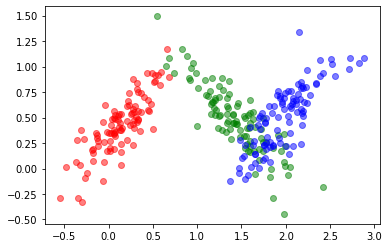

In [124]:
# set mean of each class
mu = np.array(
    [
     [0.2, 0.5],
     [1.4, 0.5],
     [2.0, 0.5]
    ]
).T

# covariance matrix of each class
sigma = np.array(
    [
     [[0.1,  0.085], [ 0.085, 0.1]],
     [[0.1, -0.085], [-0.085, 0.1]],
     [[0.1,  0.085], [ 0.085, 0.1]]
    ]
)

dim = mu.shape[0]
K = mu.shape[1]

# generate data matrix
rd.seed(1)
data = None
for i in range(K):
  if data is None:
    data = st.multivariate_normal.rvs(mean=mu[:,i], cov=sigma[i], size=100).T
  else:
    data = np.dstack([data, st.multivariate_normal.rvs(mean=mu[:,i], cov=sigma[i], size=100).T])

# plot data
c = ['r', 'g', 'b']
for j in range(K):
  plt.scatter(data[0,:,j], data[1,:,j], c=c[j], alpha=0.5)

data = data.reshape([dim, 100 * K])

# k-means algorithm

Initial mu:
 [[0.85051519 2.80285868 0.5529997 ]
 [1.45926716 0.78815103 0.28175774]]


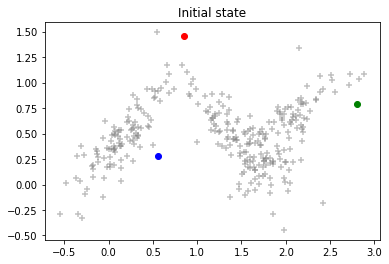

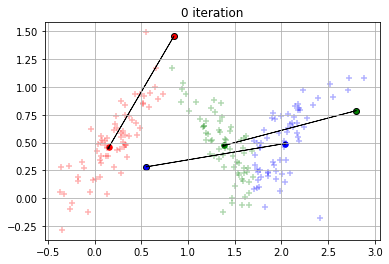

4.169302969605925


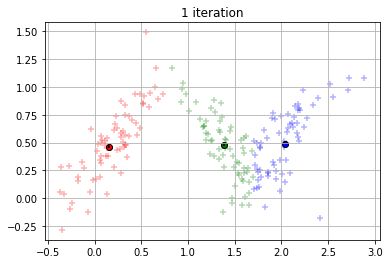

0.0
convergence


In [126]:
# initialize parameter
x_max, x_min = np.max(data[0,:]), np.min(data[0,:])
y_max, y_min = np.max(data[1,:]), np.min(data[1,:])
est_mu = np.empty([dim, K])
est_mu[0,:] = rd.uniform(low=x_min, high=x_max, size=K)
est_mu[1,:] = rd.uniform(low=y_min, high=y_max, size=K)
print('Initial mu:\n',est_mu)

# view initial est_mu
plt.scatter(data[0,:], data[1,:], c='gray', alpha=0.5, marker='+')
for k in range(K):
  mu_scat = plt.scatter(est_mu[0,k], est_mu[1,k], c=c[k])
plt.title('Initial state')

# iterate until convergence
for _iter in range(100):
  # compute nearest est_mu
  r = np.zeros(100 * K)
  for l in range(100 * K):
    r[l] = np.argmin([np.linalg.norm(data[:, l] - mu[:, n]) for n in range(K)])
  
  # update parameter
  cnt = dict(Counter(r))
  N_k = [cnt[n] for n in range(K)]
  prev_mu = est_mu.copy()
  est_mu = np.array([np.sum(data[:, r == m], axis=1)/N_k[m] for m in range(K)]).T
  diff = np.linalg.norm((est_mu - prev_mu), axis=0)
  
  # visualize
  plt.figure()
  for pt in range(100 * k):
    plt.scatter(data[0, pt], data[1, pt], c=c[int(r[pt])], alpha=0.3, marker='+')
  for cls in range(K):
    plt.arrow(prev_mu[0, cls], prev_mu[1, cls], 
              est_mu[0, cls] - prev_mu[0, cls], est_mu[1, cls] - prev_mu[1, cls], 
              lw=0.8, head_width=0.02, head_length=0.02, fc='k', ec='k')
    plt.scatter(est_mu[0, cls], est_mu[1, cls], c=c[cls], s=30)
    plt.scatter(prev_mu[0, cls], prev_mu[1, cls], c=c[cls], marker='o', edgecolors='k', linewidths=1)
  plt.title('{} iteration'.format(_iter))
  plt.grid(True)
  plt.show()

  print(np.sum(diff))
  if np.sum(diff) < 10 ** -3:
    print('convergence')
    break
